In [78]:
import numpy as np
from glob import glob
import re
import matplotlib.pyplot as plt
import matplotlib

In [2]:
loc_condition = '../data/RP/'

In [43]:
flist = glob(loc_condition+'*.txt')

In [44]:
fields2import = ['RunN', 'BoxVoltage', 'BarVoltage', 'BoxHum', 'BoxTemp', 'x_stage', 'y_stage']

In [61]:
data = []
for fname in flist:
    f = open(fname)

    rn = int(re.search('n[0-9]+_', fname).group(0)[1:-1])
    ddic = {}
    for l in f.readlines():
        idx = l.find(':')
        ddic[l[:idx]] = l[idx+2:]

    aux = []
    for n in fields2import:
        if n == 'RunN':
            aux.append(rn)
        elif not n in ddic.keys():
            aux.append(np.nan)
        else:
            try:
                a = float(ddic[n])
            except ValueError:
                a = np.nan
            aux.append(a)
    f.close()
    data.append(tuple(aux))

dt = [(n, '<i4'if n=='RunN'else'<f4') for n in fields2import]
print dt
data = np.array(data, dtype=dt)

[('RunN', '<i4'), ('BoxVoltage', '<f4'), ('BarVoltage', '<f4'), ('BoxHum', '<f4'), ('BoxTemp', '<f4'), ('x_stage', '<f4'), ('y_stage', '<f4')]


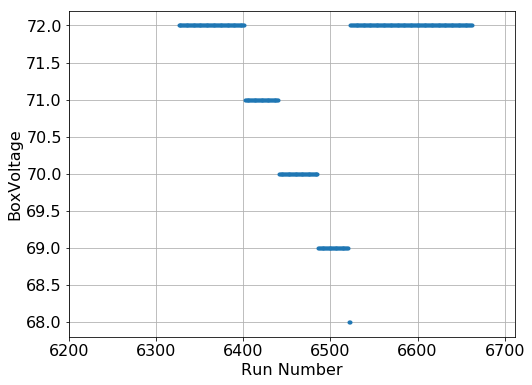

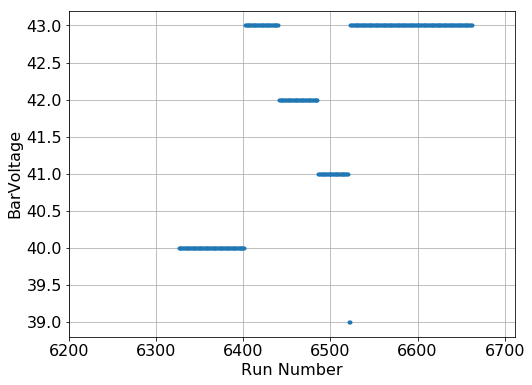

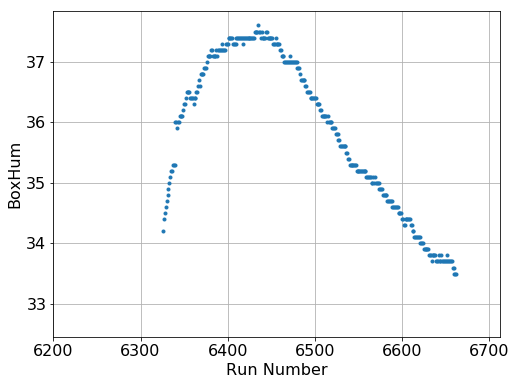

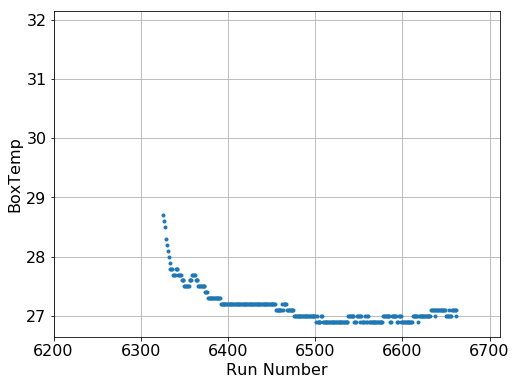

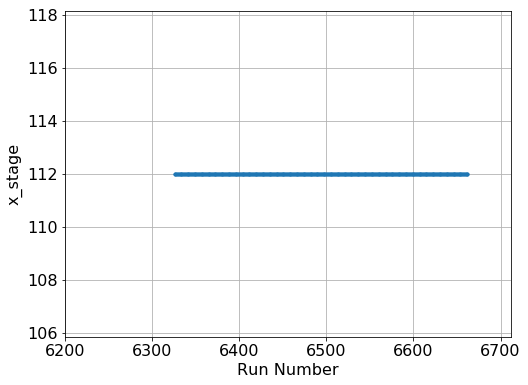

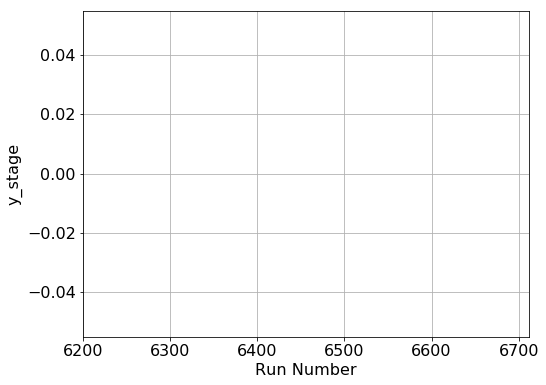

In [84]:
matplotlib.rcParams.update({'font.size': 16})
for i,n in enumerate(fields2import): 
    if n == 'RunN': continue
    plt.figure(i, figsize=(8,6))
    plt.plot(data['RunN'], data[n], '.', lw=0)
    plt.xlim(6200, 50+np.max(data['RunN']))
    plt.ylabel(n)
    plt.xlabel('Run Number')
    plt.grid()
    plt.savefig('../../../www/FNALTB_1904/StageCondition/{}.png'.format(n), bbox_inches='tight')